# Random Forest

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"numpy version: {np.__version__}")

import sklearn
print(f"sklearn version: {sklearn.__version__}")

import sys
print(f"Python version: {sys.version}")

pandas version: 2.2.3
matplotlib version: 3.9.2
seaborn version: 0.13.2
numpy version: 1.23.5
sklearn version: 1.5.2
Python version: 3.9.18 (main, Sep 11 2023, 08:16:19) 
[Clang 14.0.6 ]


### Import data

In [2]:
players_all = pd.read_csv('../games_by_players_all.csv', encoding='utf8')
players_ranked = pd.read_csv('../games_by_players_ranked.csv', encoding='utf8')
players_pro = pd.read_csv('../games_by_players_pro.csv', encoding='utf8')

teams_all = pd.read_csv('../games_by_team_all_added_features.csv', encoding='utf8')
teams_ranked = pd.read_csv('../games_by_team_ranked_added_features.csv', encoding='utf8')
teams_pro = pd.read_csv('../games_by_team_pro_added_features.csv', encoding='utf8')

small_file = pd.read_csv('../small_csv_file.csv', encoding='utf8')

In [3]:
print(players_all['winner'].value_counts(normalize=True))

winner
True     0.501909
False    0.498091
Name: proportion, dtype: float64


In [4]:

players_all = players_all.drop(columns = ['game_id', 'player_tag', 'pro'])
players_ranked = players_ranked.drop(columns = ['game_id', 'player_tag', 'pro'])
players_pro = players_pro.drop(columns = ['game_id', 'player_tag', 'pro'])

small_file = small_file.drop(columns = ['game_id', 'player_tag', 'pro'])


# Team
teams_all = teams_all.drop(columns = ['pro'])
teams_ranked = teams_ranked.drop(columns = ['pro'])
teams_pro = teams_pro.drop(columns = ['pro'])


In [5]:
players_all.head()

,movement_avg_speed,movement_total_distance,movement_time_supersonic_speed,movement_time_boost_speed,movement_time_slow_speed,movement_time_ground,movement_time_low_air,movement_time_high_air,movement_time_powerslide,movement_count_powerslide,...,positioning_percent_neutral_third,positioning_percent_defensive_half,positioning_percent_offensive_half,positioning_percent_behind_ball,positioning_percent_infront_ball,positioning_percent_most_back,positioning_percent_most_forward,positioning_percent_closest_to_ball,positioning_percent_farthest_from_ball,winner
0,1468.0,505882.0,40.34,142.29,196.16,219.80,143.43,15.56,8.01,68.0,...,26.72,83.53,16.47,75.83,24.17,31.88,28.71,39.66,28.51,False
1,1410.0,474841.0,41.74,122.11,208.83,248.88,115.01,8.80,5.41,30.0,...,24.45,79.52,20.48,67.56,32.44,31.06,36.93,31.49,32.85,False
2,1355.0,465999.0,35.87,119.38,223.64,212.03,145.07,21.79,7.24,36.0,...,26.17,80.77,19.23,67.72,32.28,37.22,32.79,27.29,38.78,False
3,1455.0,500485.0,41.75,130.76,206.38,231.33,123.58,23.97,5.61,49.0,...,29.87,54.02,45.98,77.37,22.63,28.14,44.34,41.22,29.30,True
4,1518.0,521069.0,50.22,149.49,179.09,241.24,128.04,9.51,3.34,32.0,...,35.38,61.49,38.51,79.66,20.34,29.56,30.44,30.15,34.75,True


In [6]:
teams_all.head()

,movement_avg_speed_1,movement_total_distance_1,movement_time_supersonic_speed_1,movement_time_boost_speed_1,movement_time_slow_speed_1,movement_time_ground_1,movement_time_low_air_1,movement_time_high_air_1,movement_time_powerslide_1,movement_count_powerslide_1,...,avg_positioning_time_most_back,max_movement_percent_high_air,min_movement_percent_high_air,var_movement_percent_high_air,avg_movement_percent_high_air,max_movement_percent_supersonic_speed,min_movement_percent_supersonic_speed,var_movement_percent_supersonic_speed,avg_movement_percent_supersonic_speed,winner
0,1468.0,505882.0,40.34,142.29,196.16,219.80,143.43,15.56,8.01,68.0,...,117.70,5.75,2.36,1.92,4.07,11.20,9.47,0.52,10.44,False
1,1455.0,500485.0,41.75,130.76,206.38,231.33,123.58,23.97,5.61,49.0,...,119.37,6.33,0.66,5.57,3.17,13.26,6.27,8.49,10.18,True
2,1430.0,561540.0,50.30,150.27,216.30,217.17,177.03,22.67,11.74,103.0,...,132.60,5.44,3.86,0.45,4.78,14.12,7.32,8.11,11.17,True
3,1559.0,609572.0,66.07,166.44,181.22,237.20,165.62,10.91,11.98,120.0,...,133.23,5.50,2.64,1.37,4.14,15.97,7.48,12.22,11.40,False
4,1486.0,486636.0,27.96,145.74,177.11,218.76,123.81,8.24,7.00,62.0,...,114.97,6.45,1.25,5.01,3.35,11.70,7.29,3.76,8.99,False


### X,y division

In [7]:
X_players_all = players_all.iloc[:, 0:44]
X_players_ranked = players_ranked.iloc[:, 0:44]
X_players_pro = players_pro.iloc[:, 0:44]
X_small_file = small_file.iloc[:, 0:44]

In [8]:
y_players_all = players_all.iloc[:, 44]
y_players_ranked = players_ranked.iloc[:, 44]
y_players_pro = players_pro.iloc[:, 44]
y_small_file = small_file.iloc[:, 44]

In [9]:
# team
X_teams_all = teams_all.iloc[:, 0:200]
X_teams_ranked = teams_ranked.iloc[:, 0:200]
X_teams_pro = teams_pro.iloc[:, 0:200]

In [10]:
# Team
y_teams_all = teams_all.iloc[:, 200]
y_teams_ranked = teams_ranked.iloc[:, 200]
y_teams_pro = teams_pro.iloc[:, 200]

### Train-test split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_players_all, y_players_all, random_state=20, test_size=0.2)

# Model 1 -----------------------------------------------

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
# random forests model
rf = RandomForestClassifier(n_estimators=500,
                             min_samples_split=10)

In [16]:
#40 sec voor individueel / 55 sec voor teams / nu 5 min met extra HP

In [17]:
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=500)

## Scores

In [18]:
y_pred = rf.predict(X_test)

In [19]:
rf.score(X_test, y_test)

0.7423895409867354

### F1 enzoo metrics

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.74      0.74      0.74     20860
        True       0.74      0.74      0.74     21056

    accuracy                           0.74     41916
   macro avg       0.74      0.74      0.74     41916
weighted avg       0.74      0.74      0.74     41916



In [22]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [23]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("accuracy", accuracy)
print("recall", recall)
print("precision", precision)
print("f1", f1)

accuracy 0.7423895409867354
recall 0.7413563829787234
precision 0.7446808510638298
f1 0.7430148983768861


## Conf matrix

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
print(confusion_matrix(y_test, y_pred))

[[15508  5352]
 [ 5446 15610]]


[[15508  5352]
 [ 5446 15610]]
0.7423895409867354


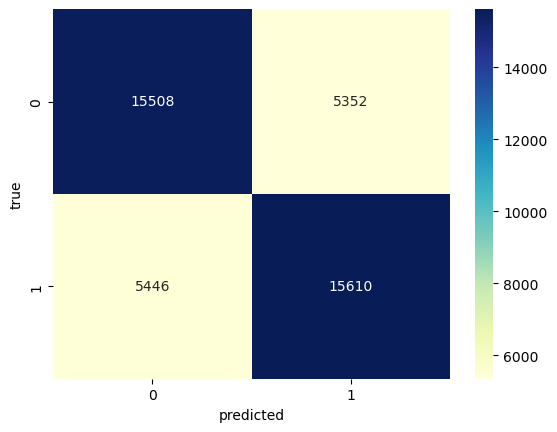

In [26]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm)
print(accuracy)
labels = list(y_train.keys())

s = sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f")
s.set_xlabel("predicted")
s.set_ylabel("true")
plt.show()

## ROC curve

ROC AUC Score: 0.821


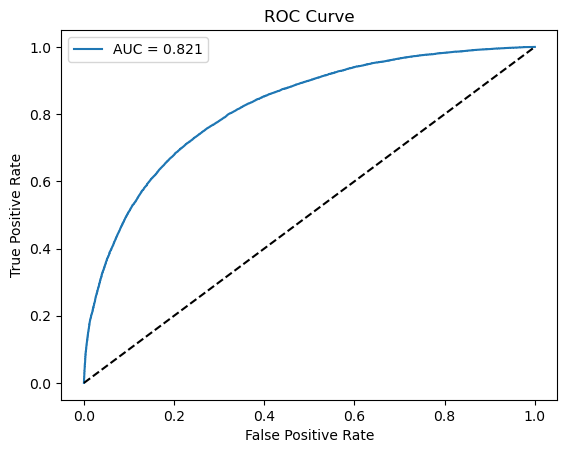

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Imporant features

In [28]:
features = pd.DataFrame(rf.feature_importances_, index = X_train.columns)

In [29]:
features.sort_values(0, ascending=False)

,0
positioning_percent_infront_ball,0.083607
positioning_percent_behind_ball,0.080998
positioning_time_infront_ball,0.063496
positioning_time_behind_ball,0.038390
positioning_percent_most_forward,0.037857
positioning_time_most_forward,0.034133
positioning_percent_most_back,0.029103
positioning_avg_distance_to_ball_possession,0.029047
positioning_time_most_back,0.028564
positioning_time_offensive_third,0.022412


In [30]:
correlations = pd.DataFrame(X_train.corrwith(y_train))
correlations.sort_values(0, ascending=False)

,0
positioning_percent_behind_ball,0.370834
positioning_time_behind_ball,0.145963
positioning_percent_offensive_half,0.142705
positioning_avg_distance_to_ball_possession,0.135400
positioning_percent_offensive_third,0.134028
positioning_time_offensive_third,0.118873
positioning_time_offensive_half,0.114949
positioning_avg_distance_to_mates,0.095282
positioning_avg_distance_to_ball,0.094631
positioning_percent_neutral_third,0.073640


## statistics

In [31]:
# average for winners and average for losers
X_train['positioning_percent_behind_ball'].groupby(y_train).mean()


winner
False    69.890602
True     73.678368
Name: positioning_percent_behind_ball, dtype: float64

In [32]:
# average for winners and average for losers
X_train['positioning_percent_infront_ball'].groupby(y_train).mean()

winner
False    30.109398
True     26.321632
Name: positioning_percent_infront_ball, dtype: float64

In [33]:
# average for winners and average for losers
X_train['positioning_percent_offensive_half'].groupby(y_train).mean()

winner
False    34.171689
True     36.109464
Name: positioning_percent_offensive_half, dtype: float64

In [34]:
# average for winners and average for losers
X_train['positioning_percent_defensive_half'].groupby(y_train).mean()

winner
False    65.828310
True     63.890536
Name: positioning_percent_defensive_half, dtype: float64

# Model 2 -------------------------------

## Model

In [35]:
rf2 = RandomForestClassifier(n_estimators=500,
                             criterion='entropy',
                             min_samples_split=10,
                             max_depth = 14,
                             random_state = 42
)

In [36]:
#13 min de volgende / 8 min voor team / 4 op blauwe laptop

In [37]:
rf2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=500, random_state=42)

## Scores

In [38]:
y_pred2 = rf2.predict(X_test)

In [39]:
rf2.score(X_test, y_test)

0.7334669338677354

In [40]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

       False       0.73      0.73      0.73     20860
        True       0.74      0.73      0.73     21056

    accuracy                           0.73     41916
   macro avg       0.73      0.73      0.73     41916
weighted avg       0.73      0.73      0.73     41916



In [41]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [42]:
accuracy = accuracy_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print("accuracy", accuracy)
print("recall", recall)
print("precision", precision)
print("f1", f1)

accuracy 0.7334669338677354
recall 0.7331876899696048
precision 0.735423018292683
f1 0.7343036529680366


In [43]:
from sklearn.metrics import accuracy_score

In [44]:
y_pred2 = rf2.predict(X_test)
y_pred_classes2 = y_pred2
y_test_classes2 = y_test
print("DNN Accuracy:", accuracy_score(y_test_classes2, y_pred_classes2))

DNN Accuracy: 0.7334669338677354


### Conf matrix

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
print(confusion_matrix(y_test, y_pred2))

[[15306  5554]
 [ 5618 15438]]


[[15306  5554]
 [ 5618 15438]]
0.7334669338677354


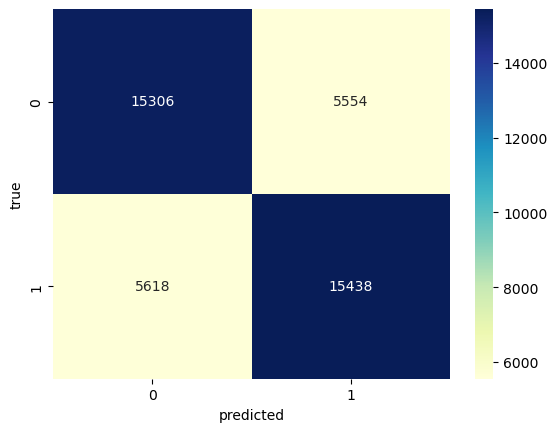

In [47]:
cm = confusion_matrix(y_test, y_pred2)
accuracy = accuracy_score(y_test, y_pred2)
print(cm)
print(accuracy)
labels = list(y_train.keys())

s = sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f")
s.set_xlabel("predicted")
s.set_ylabel("true")
plt.show()


### roc score

ROC AUC Score: 0.813


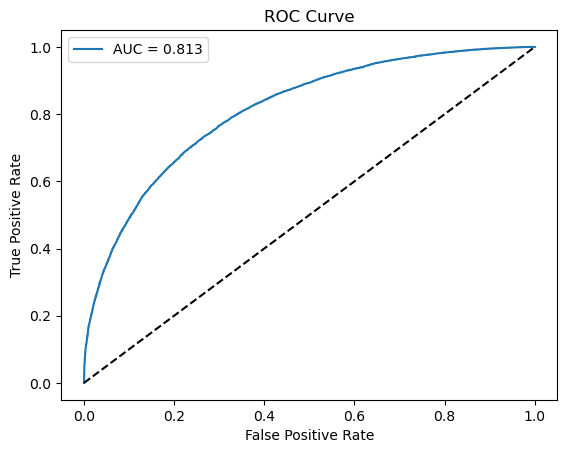

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = rf2.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Important features

In [49]:
features = pd.DataFrame(rf2.feature_importances_, index = X_train.columns)

In [50]:
features.sort_values(0, ascending=False)

,0
positioning_percent_behind_ball,0.119161
positioning_percent_infront_ball,0.115921
positioning_time_infront_ball,0.083096
positioning_percent_most_forward,0.046168
positioning_time_behind_ball,0.044546
positioning_time_most_forward,0.040652
positioning_time_most_back,0.031818
positioning_percent_most_back,0.031763
positioning_avg_distance_to_ball_possession,0.030442
positioning_percent_offensive_third,0.022507
